# Plant Disease Classification using Convolutional Neural Network (CNN)

## **Introduction**
In this project, we'll build a Convolutional Neural Network (CNN) to classify plant diseases based on images. The dataset used contains images of healthy and diseased plants.

## **Dataset**
We will use the [New Plant Diseases Dataset (Augmented)](https://www.kaggle.com/vipoooool/new-plant-diseases-dataset) from Kaggle. This dataset includes images of various plant diseases and healthy plants.

### **Libraries Used**

- **Pandas:** Data manipulation and analysis.
- **NumPy:** Numerical computing and array operations.
- **Matplotlib:** Data visualization library.
- **TensorFlow:** Open-source machine learning framework.
- **Keras (from TensorFlow):** High-level neural networks API.
- **OS:** Operating system-related functions.
- **PIL (Python Imaging Library):** Image processing library.
- **Seaborn:** Data visualization library based on Matplotlib.
- **OpenCV (cv2):** Computer vision library.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Origin data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2267.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2268.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2269.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2270.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2271.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2272.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2273.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2274.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2275.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2276.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2277.JPG  
  inflating: Origin data/valid/Late_blight/Tomato___Late_blight_2278.JPG  
  inflating: Origin data/valid/Late_blight/Tomato

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from PIL import Image
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2. Set Up Data Directories

In [ ]:
BASE_DIR = '/content/Origin data'

test_dir = os.path.join(BASE_DIR, 'valid')
train_dir = os.path.join(BASE_DIR, 'train')

train_class_dir = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_class_dir = [os.path.join(test_dir, d) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

train_image_paths = []
test_image_paths = []

for class_dir in train_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)

for class_dir in test_class_dir:
    for file_name in os.listdir(class_dir):
        if file_name.endswith(('.JPG','.jpg','jpeg')):
            image_path = os.path.join(class_dir, file_name)
            train_image_paths.append(image_path)


train_labels = [os.path.basename(class_dir) for class_dir in train_class_dir]
test_labels = [os.path.basename(class_dir) for class_dir in test_class_dir]

In [ ]:
classes_train = os.listdir(train_dir)
classes_train

['Haunglongbing_(Citrus_greening)',
 'Early_blight',
 'Healthy',
 'Spider_mites Two-spotted_spider_mite',
 'Powdery_mildew',
 'Late_blight',
 'Leaf_scorch',
 'Cercospora_leaf_spot Gray_leaf_spot',
 'Leaf_Mold',
 'Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Bacterial_spot',
 'Black_rot',
 'Northern_Leaf_Blight',
 'Cedar_apple_rust',
 'Apple_scab',
 'Target_Spot',
 'Tomato_mosaic_virus',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Common_rust',
 'Esca_(Black_Measles)',
 'Septoria_leaf_spot']

### 3. Data Preprocessing

In [ ]:
target_size = (100,100)
batch_size = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 70295 images belonging to 21 classes.
Found 17572 images belonging to 21 classes.


In [ ]:
train_generator.class_indices

{'Apple_scab': 0,
 'Bacterial_spot': 1,
 'Black_rot': 2,
 'Cedar_apple_rust': 3,
 'Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Common_rust': 5,
 'Early_blight': 6,
 'Esca_(Black_Measles)': 7,
 'Haunglongbing_(Citrus_greening)': 8,
 'Healthy': 9,
 'Late_blight': 10,
 'Leaf_Mold': 11,
 'Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Leaf_scorch': 13,
 'Northern_Leaf_Blight': 14,
 'Powdery_mildew': 15,
 'Septoria_leaf_spot': 16,
 'Spider_mites Two-spotted_spider_mite': 17,
 'Target_Spot': 18,
 'Tomato_Yellow_Leaf_Curl_Virus': 19,
 'Tomato_mosaic_virus': 20}

In [ ]:
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
num_classes = len(class_directories)
num_classes

21

### 4. Build CNN Model


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Define input shape explicitly as the first layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
from keras.optimizers import Adam

INIT_LR = 1e-3
opt = Adam(learning_rate=INIT_LR)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

### 5. Train the Model

In [ ]:
num_epochs = 15
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
)

Epoch 1/15
550/550 [==============================] - 342s 609ms/step - loss: 2.0774 - accuracy: 0.4070 - val_loss: 1.2007 - val_accuracy: 0.5912
Epoch 2/15
550/550 [==============================] - 304s 553ms/step - loss: 0.9378 - accuracy: 0.6963 - val_loss: 0.5222 - val_accuracy: 0.8267
Epoch 3/15
550/550 [==============================] - 306s 557ms/step - loss: 0.5162 - accuracy: 0.8357 - val_loss: 0.3015 - val_accuracy: 0.8975
Epoch 4/15
550/550 [==============================] - 328s 597ms/step - loss: 0.3517 - accuracy: 0.8900 - val_loss: 0.2328 - val_accuracy: 0.9215
Epoch 5/15
550/550 [==============================] - 307s 558ms/step - loss: 0.2715 - accuracy: 0.9141 - val_loss: 0.2697 - val_accuracy: 0.9119
Epoch 6/15
550/550 [==============================] - 306s 555ms/step - loss: 0.2292 - accuracy: 0.9287 - val_loss: 0.1591 - val_accuracy: 0.9462
Epoch 7/15
550/550 [==============================] - 329s 598ms/step - loss: 0.1965 - accuracy: 0.9392 - val_loss: 0.2146 -

In [ ]:
# Save just the weights of the trained model
model.save_weights('CNN_weights_94.weights.h5')

In [ ]:
# Save the entire trained model (architecture + weights)
model.save('CNN_model_94.keras')

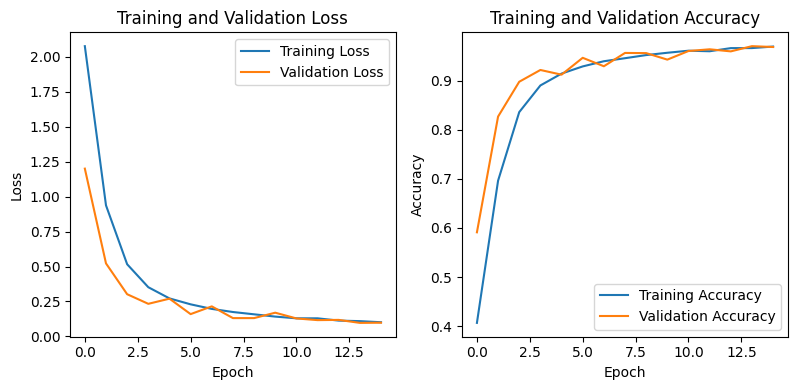

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




plt.tight_layout()
plt.show()
